# 3. 다이렉트 마케팅 데이터
- 연간 쇼핑몰 이용액 예측

# 0. 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
direct_marketing = pd.read_csv('https://raw.githubusercontent.com/fintech-data/Revolution/main/data/DirectMarketing.csv')

In [ ]:
direct_marketing

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Mailing,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671


In [ ]:
print(direct_marketing)

        Age  Gender OwnHome  Married Location  Salary  Children History  \
0       Old  Female     Own   Single      Far   47500         0    High   
1    Middle    Male    Rent   Single    Close   63600         0    High   
2     Young  Female    Rent   Single    Close   13500         0     Low   
3    Middle    Male     Own  Married    Close   85600         1    High   
4    Middle  Female     Own   Single    Close   68400         0    High   
..      ...     ...     ...      ...      ...     ...       ...     ...   
995   Young  Female    Rent   Single    Close   19400         1     NaN   
996  Middle    Male    Rent   Single      Far   40500         1     NaN   
997     Old    Male     Own   Single    Close   44800         0  Medium   
998  Middle    Male     Own  Married    Close   79000         2  Medium   
999   Young    Male    Rent  Married    Close   53600         1  Medium   

     Mailing  AmountSpent  
0          6          755  
1          6         1318  
2         18   

In [ ]:
direct_marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Mailing,AmountSpent,APC
0,Old,Female,Own,Single,Far,47500,0,High,6,755,0.015895
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,0.020723
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,0.021926
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,0.028458
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,0.019064


- Age: str, 나이
- Gender: str, 성별
- OwnHome: str, 주택보유여부(자가/임대)
- Married: str, 결혼여부
- Location: str, 집에서 마트까지 거리 (Far : 도보 30분 이상/close : 도보 30분 이내)
- Salary: int 연봉
- Children: int, 자녀수
- History: str, 회원가입연수 (5년 이상 : high, 2~5년 : Middle, 1년 이내 : Low)
- Mailing: int, 쇼핑몰 뉴스레터 발송횟수
- **AmountSpent: int, 연간 쇼핑몰 이용액**

In [ ]:
direct_marketing['APC']=direct_marketing['AmountSpent']/direct_marketing['Salary']

# 1. 데이터 전처리

In [ ]:
direct_marketing.shape

(1000, 11)

In [ ]:
direct_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1000 non-null   object 
 1   Gender       1000 non-null   object 
 2   OwnHome      1000 non-null   object 
 3   Married      1000 non-null   object 
 4   Location     1000 non-null   object 
 5   Salary       1000 non-null   int64  
 6   Children     1000 non-null   int64  
 7   History      697 non-null    object 
 8   Mailing      1000 non-null   int64  
 9   AmountSpent  1000 non-null   int64  
 10  APC          1000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


## 1-1. 결측치 제거

In [ ]:
direct_marketing.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Mailing          0
AmountSpent      0
APC              0
dtype: int64

In [ ]:
direct_marketing['History'].unique()

array(['High', 'Low', 'Medium', nan], dtype=object)

In [ ]:
# History가 없는 경우 존재 -> NaN 값을 'None'이라는 없다는 표시의 문자열로 변환 
direct_marketing['History'] = direct_marketing['History'].fillna('None')

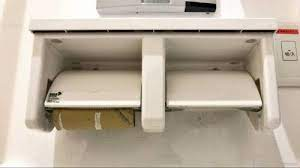

In [ ]:
direct_marketing.isnull().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
History        0
Mailing        0
AmountSpent    0
APC            0
dtype: int64

## 1-2. 이상치 탐지

In [ ]:
direct_marketing.describe()

,Salary,Children,Mailing,AmountSpent,APC
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,56103.900000,0.93400,14.682000,1216.770000,0.021453
std,30616.314826,1.05107,6.622895,961.068613,0.010420
min,10100.000000,0.00000,6.000000,38.000000,0.002187
25%,29975.000000,0.00000,6.000000,488.250000,0.014115
50%,53700.000000,1.00000,12.000000,962.000000,0.020127
75%,77025.000000,2.00000,18.000000,1688.500000,0.028203
max,168800.000000,3.00000,24.000000,6217.000000,0.058201


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects   
%matplotlib inline

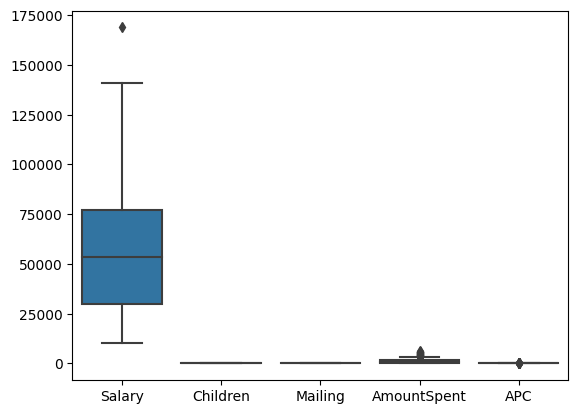

In [ ]:
bplot= sns.boxplot(data=direct_marketing)

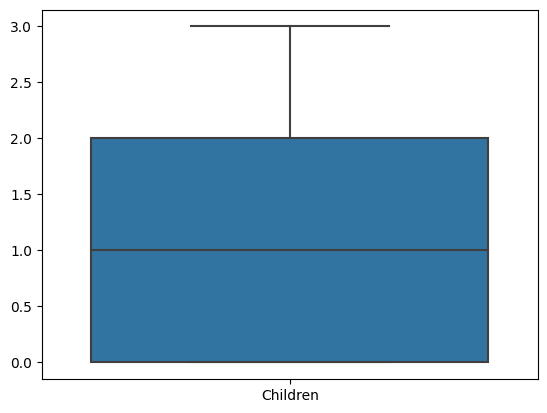

In [ ]:
bplot= sns.boxplot(data= direct_marketing[['Children']])

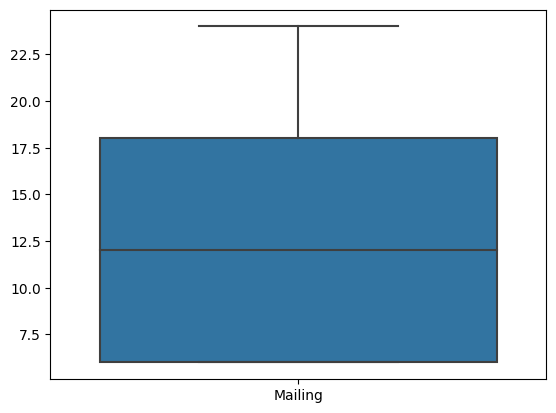

In [ ]:
bplot= sns.boxplot(data= direct_marketing[['Mailing']])

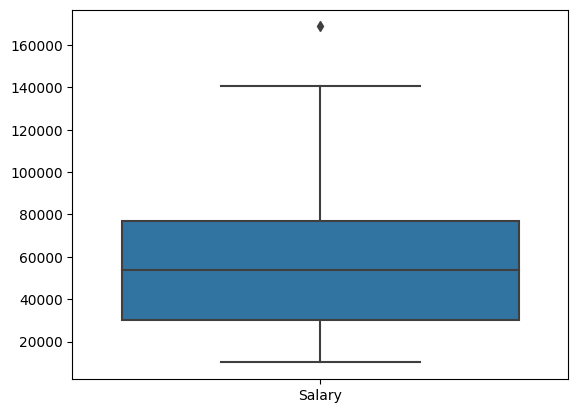

In [ ]:
bplot= sns.boxplot(data= direct_marketing[['Salary']])

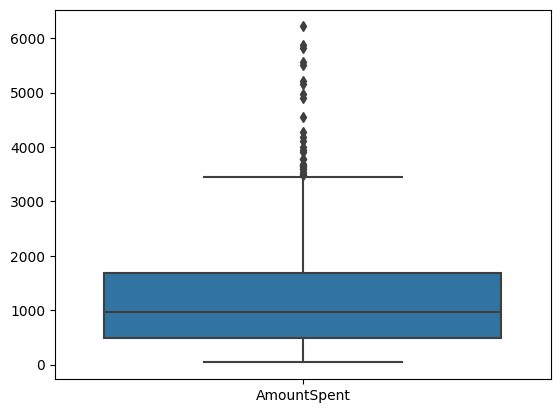

In [ ]:
bplot= sns.boxplot(data= direct_marketing[['AmountSpent']])
# 오른쪽으로 꼬리가 긴 분포 -> 이 역시 지우면 안되는 값이라고 판단되기 때문에 로그 변환으로 정규분포 모형으로 바꿔주는게 좋을 것 같다. 

# 2. 탐색적 자료분석 (EDA)

## 2-1 범주형

In [ ]:
direct_marketing.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Mailing,AmountSpent,APC
0,Old,Female,Own,Single,Far,47500,0,High,6,755,0.015895
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,0.020723


<Axes: >

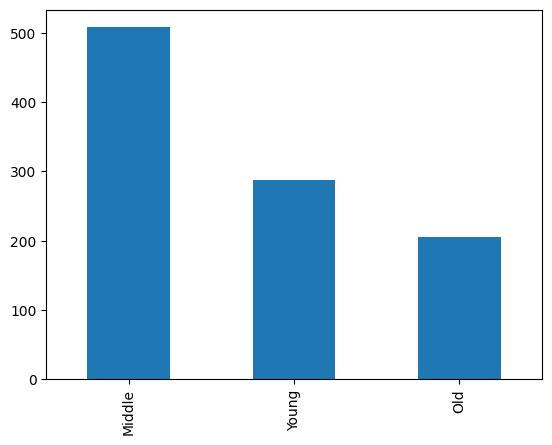

In [ ]:
direct_marketing['Age'].value_counts().plot.bar()
# 중간 나이대가 가장 많다. 

<Axes: >

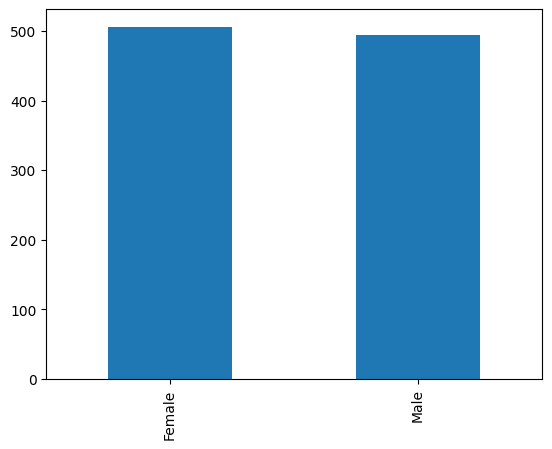

In [ ]:
direct_marketing['Gender'].value_counts().plot.bar()

<Axes: >

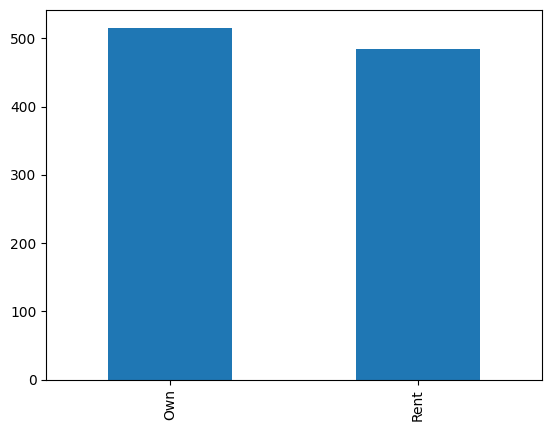

In [ ]:
direct_marketing['OwnHome'].value_counts().plot.bar()

<Axes: >

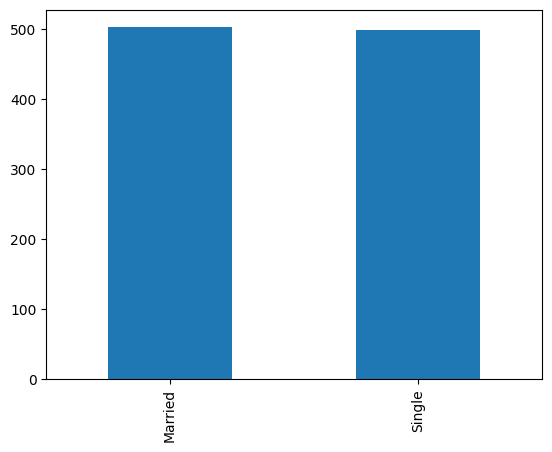

In [ ]:
direct_marketing['Married'].value_counts().plot.bar()

<Axes: >

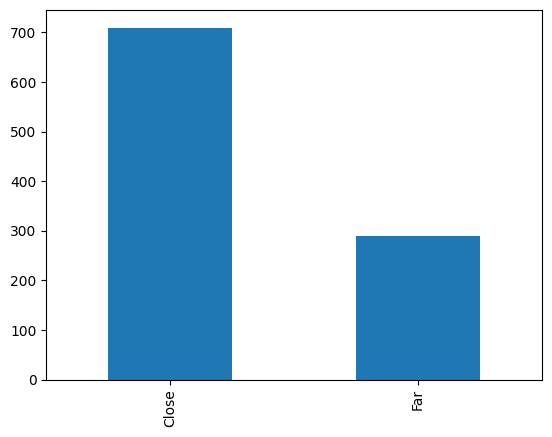

In [ ]:
direct_marketing['Location'].value_counts().plot.bar()

<Axes: >

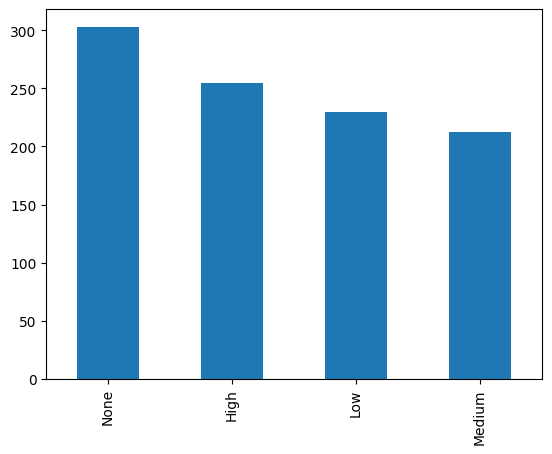

In [ ]:
direct_marketing['History'].value_counts().plot.bar()

## 2-2 범주형 독립변수와 종속변수 간의 관계

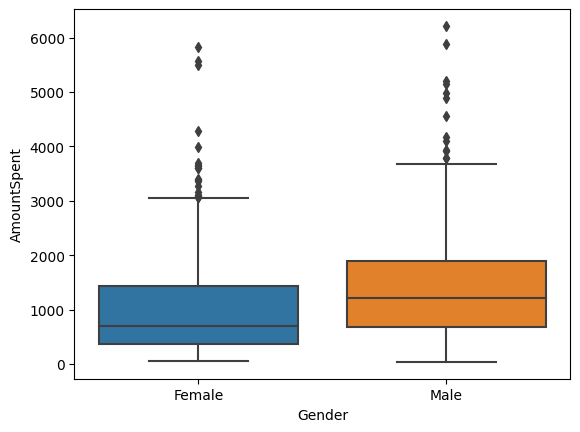

In [ ]:
bplot= sns.boxplot(y = 'AmountSpent', x= 'Gender', data = direct_marketing)
# 남자가 여자보다 쇼핑몰 이용 금액이 크다. 

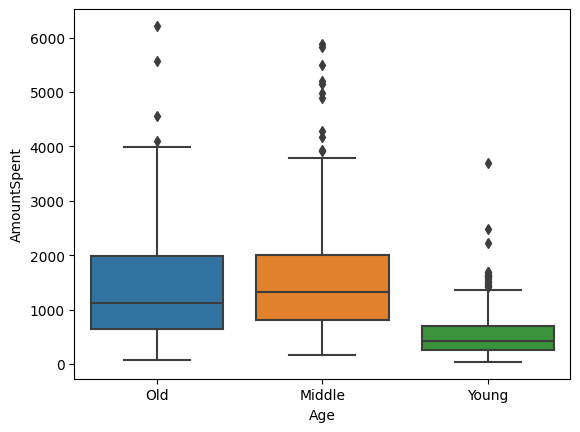

In [ ]:
bplot= sns.boxplot(y = 'AmountSpent', x= 'Age', data = direct_marketing)
# 나이가 어릴 때 쇼핑몰 이용 금액이 가장 낮고, Middle일 때 가장 높다

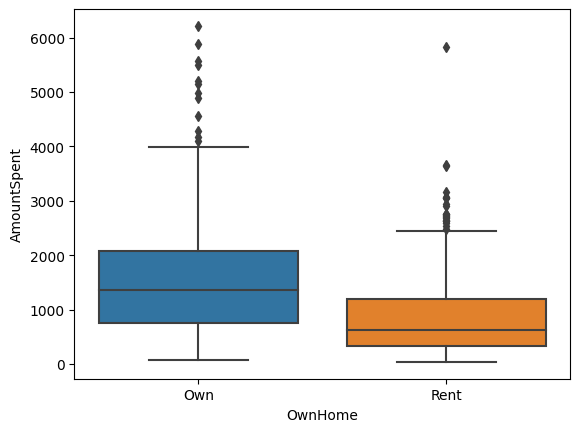

In [ ]:
bplot= sns.boxplot(y = 'AmountSpent', x= 'OwnHome', data = direct_marketing)
# 집이 있는 경우, rent인 경우보다 쇼핑몰 이용 금액이 더 많다 

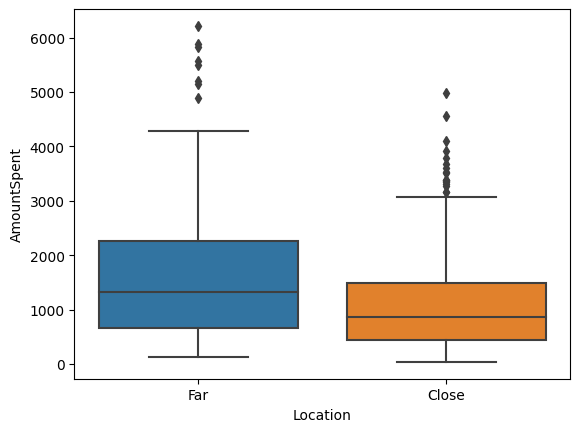

In [ ]:
bplot= sns.boxplot(y = 'AmountSpent', x= 'Location', data = direct_marketing)
# 가까울수록 더 쇼핑몰을 자주 이용하기 때문에 더 많은 금액을 사용할것이라고 예상했지만 이와 다르기 Far 일 경우가 더 크다 
# 데이터 개수의 차이 때문인가 싶어서 barchart를 그려보았다.

<Axes: xlabel='Location', ylabel='AmountSpent'>

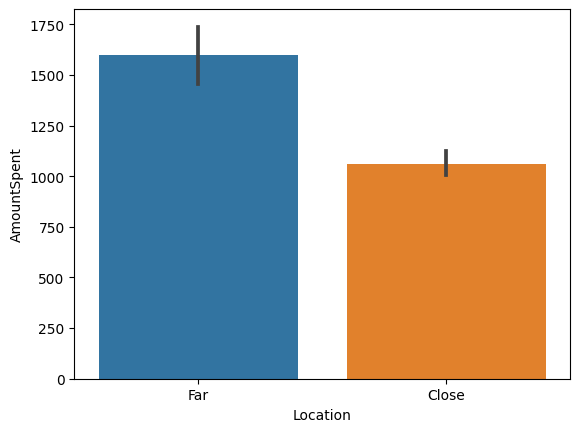

In [ ]:
# 쇼핑몰의 거리가 멀수록 더 많이 사는 경향이 있다. 
# (예상 이유: 멀리살수록 가끔 와서 많은 금액을 쓰는 경향이 있을 것이다. -> 이는 단순히 데이터를 통한 예상 )
sns.barplot(x='Location', y='AmountSpent', data=direct_marketing)

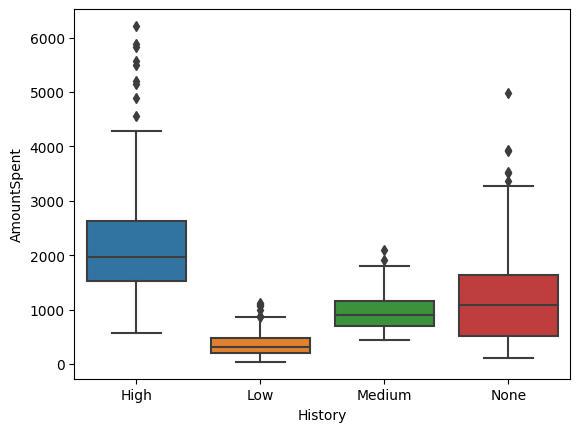

In [ ]:
bplot= sns.boxplot(y = 'AmountSpent', x= 'History', data = direct_marketing)
# 확실히 회원가입연수가 High일 수록 더 많이 사는 경향이 있고, None인 경우 비회원이기 때문에 판단하기 어렵다. 

In [ ]:
# y=를 salary로 해서 위의 그래프를 그려보세요.(5분) 

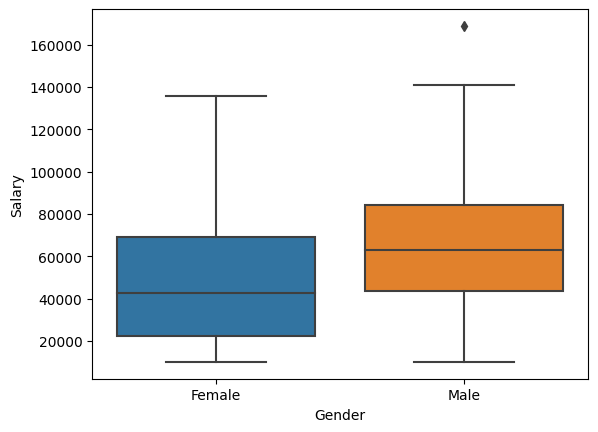

In [ ]:
bplot= sns.boxplot(y = 'Salary', x= 'Gender', data = direct_marketing)
# 남자가 여자보다 쇼핑몰 이용 금액이 크다. 

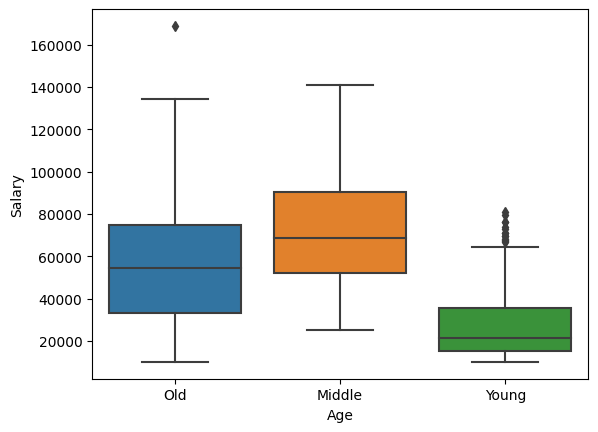

In [ ]:
bplot= sns.boxplot(y = 'Salary', x= 'Age', data = direct_marketing)
# 나이가 어릴 때 쇼핑몰 이용 금액이 가장 낮고, Middle일 때 가장 높다

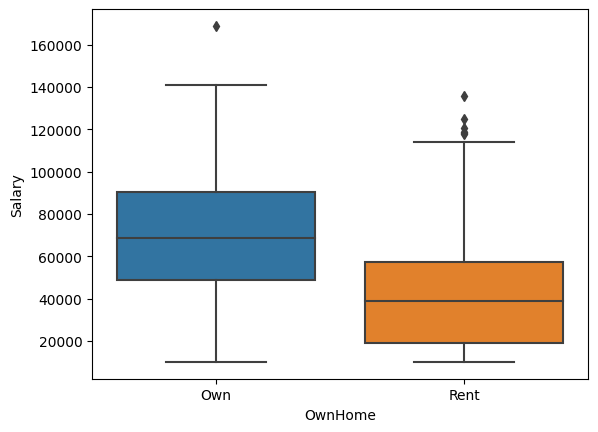

In [ ]:
bplot= sns.boxplot(y = 'Salary', x= 'OwnHome', data = direct_marketing)
# 집이 있는 경우, rent인 경우보다 쇼핑몰 이용 금액이 더 많다 

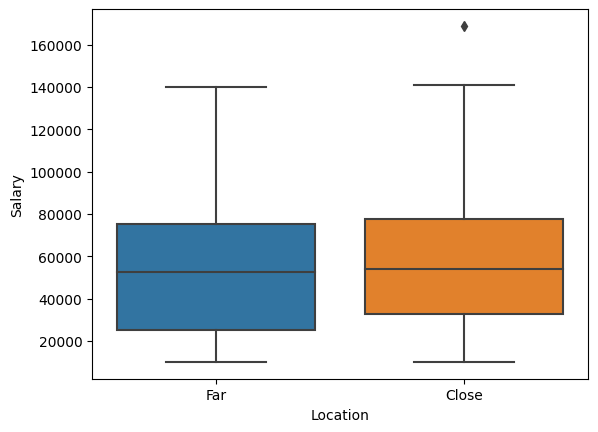

In [ ]:
bplot= sns.boxplot(y = 'Salary', x= 'Location', data = direct_marketing)
# 가까울수록 더 쇼핑몰을 자주 이용하기 때문에 더 많은 금액을 사용할것이라고 예상했지만 이와 다르기 Far 일 경우가 더 크다 
# 데이터 개수의 차이 때문인가 싶어서 barchart를 그려보았다.

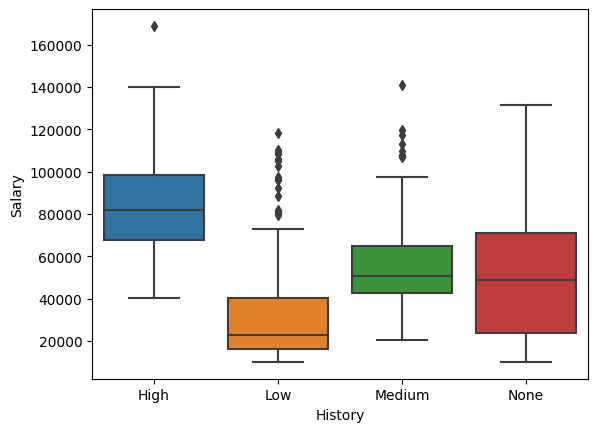

In [ ]:
bplot= sns.boxplot(y = 'Salary', x= 'History', data = direct_marketing)
# 확실히 회원가입연수가 High일 수록 더 많이 사는 경향이 있고, None인 경우 비회원이기 때문에 판단하기 어렵다

<Axes: xlabel='Location', ylabel='Salary'>

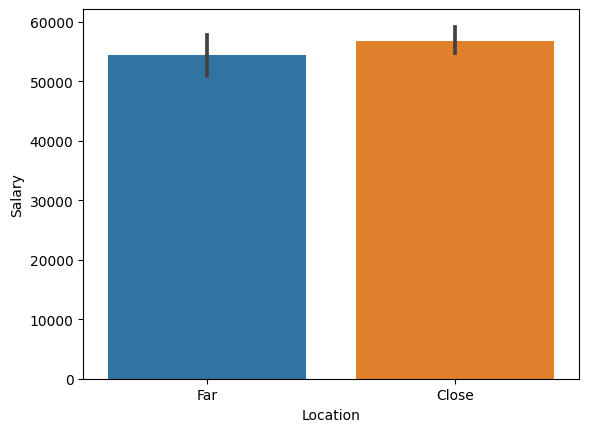

In [ ]:
sns.barplot(x='Location', y='Salary', data=direct_marketing)

<Axes: xlabel='Gender', ylabel='Salary'>

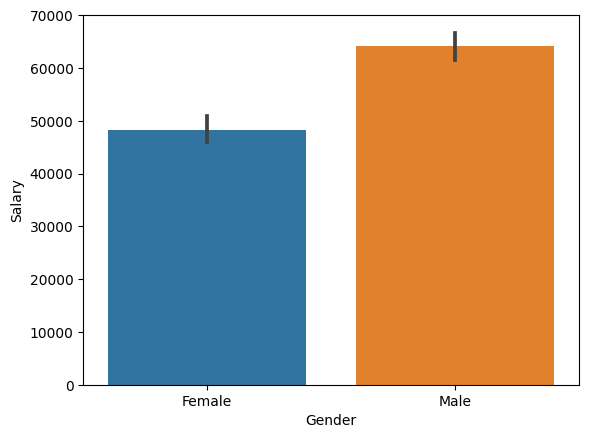

In [ ]:
sns.barplot(x='Gender', y='Salary', data=direct_marketing)

<Axes: xlabel='OwnHome', ylabel='Salary'>

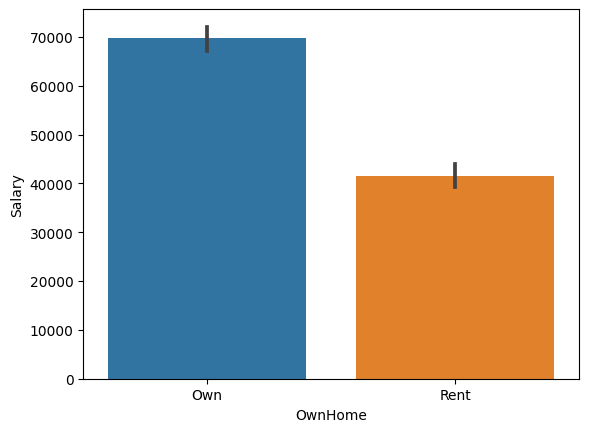

In [ ]:
sns.barplot(x='OwnHome', y='Salary', data=direct_marketing)

## 2-3. 연속형

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
direct_marketing.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Mailing,AmountSpent,APC
0,Old,Female,Own,Single,Far,47500,0,High,6,755,0.015895
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,0.020723


<Axes: xlabel='Salary', ylabel='Density'>

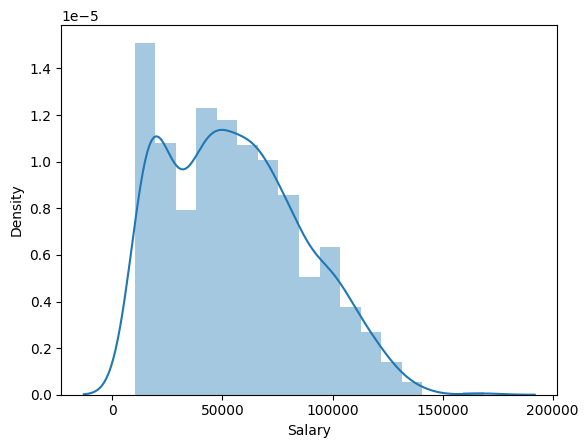

In [ ]:
# 오른쪽으로 꼬리가 긴 분포를 띈다.
sns.distplot(direct_marketing['Salary'])

<Axes: >

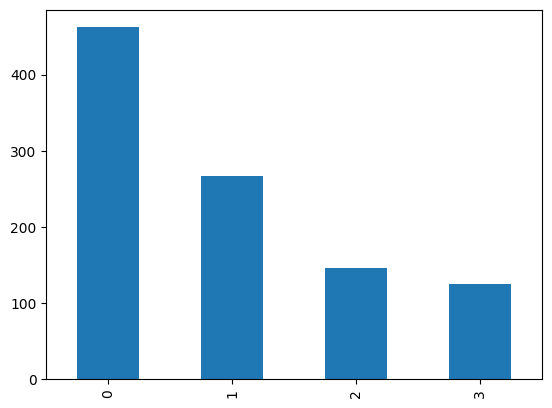

In [ ]:
# 자식이 없는 경우가 가장 많다. 
direct_marketing['Children'].value_counts().plot.bar()

<Axes: >

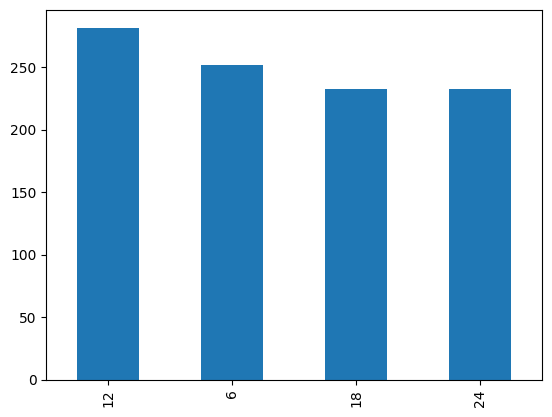

In [ ]:
# 쇼핑몰 뉴스레터 발송횟수는 비슷하다 
direct_marketing['Mailing'].value_counts().plot.bar()

<Axes: xlabel='AmountSpent', ylabel='Density'>

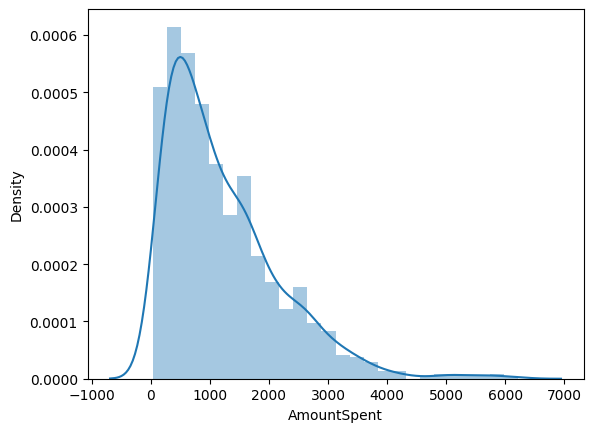

In [ ]:
# 오른쪽으로 꼬리가 긴 분포를 띈다.
sns.distplot(direct_marketing['AmountSpent']) 

# 로그 변환 해주자 

In [ ]:
import numpy as np

<Axes: xlabel='AmountSpent', ylabel='Density'>

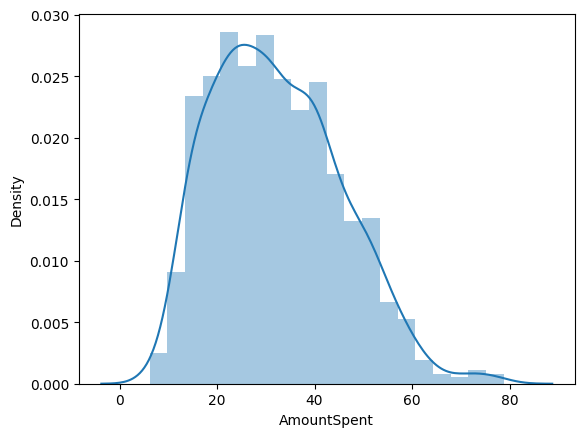

In [ ]:
# 오른쪽으로 꼬리가 긴 분포를 띈다.
sns.distplot(np.sqrt(direct_marketing['AmountSpent'])) 

# sqrt변환 결과 데이터가 정규분포와 유사한 형태를 띈다. 

## 2-4. 연속형 독립변수와 종속변수 간의 관계

In [ ]:
corr = direct_marketing.corr(method = 'pearson') 
corr

,Salary,Children,Mailing,AmountSpent,APC
Salary,1.000000,0.049663,0.183551,0.699596,0.041323
Children,0.049663,1.000000,-0.113455,-0.222308,-0.391051
Mailing,0.183551,-0.113455,1.000000,0.472650,0.574406
AmountSpent,0.699596,-0.222308,0.472650,1.000000,0.661854
APC,0.041323,-0.391051,0.574406,0.661854,1.000000


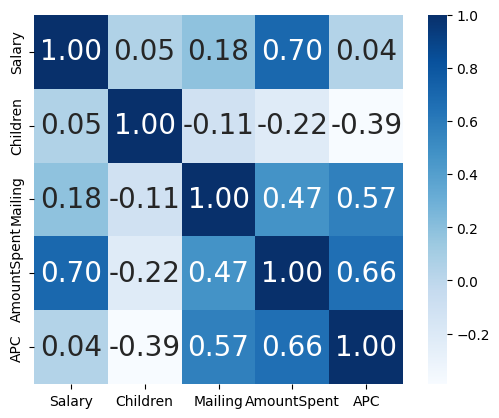

In [ ]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

# 종속변수(연간쇼핑몰이용금액)와의 상관관계의 경우, 
# Salary와의 상관관계가 가장 높고, 
# Mailing이 많을 수록 쇼핑몰 이용 금액이 높다는 것 또한 알 수 있다. 
# 하지만, Children이 많을수록 쇼핑 몰 이용 금액이 줄어든다는 것을 알 수 있다.

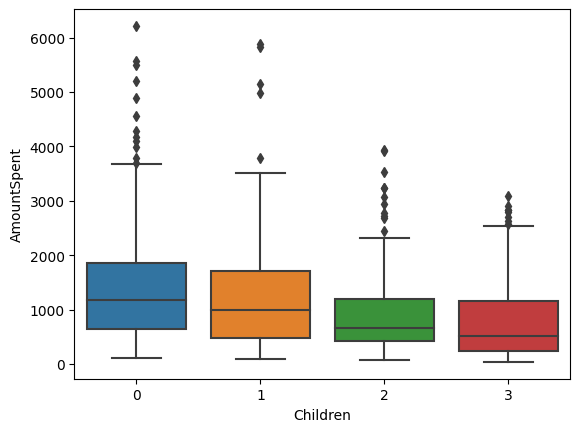

In [ ]:
bplot= sns.boxplot(y = 'AmountSpent', x= 'Children', data = direct_marketing)
# 자녀수가 많을수록 이용금액이 줄어든다. 

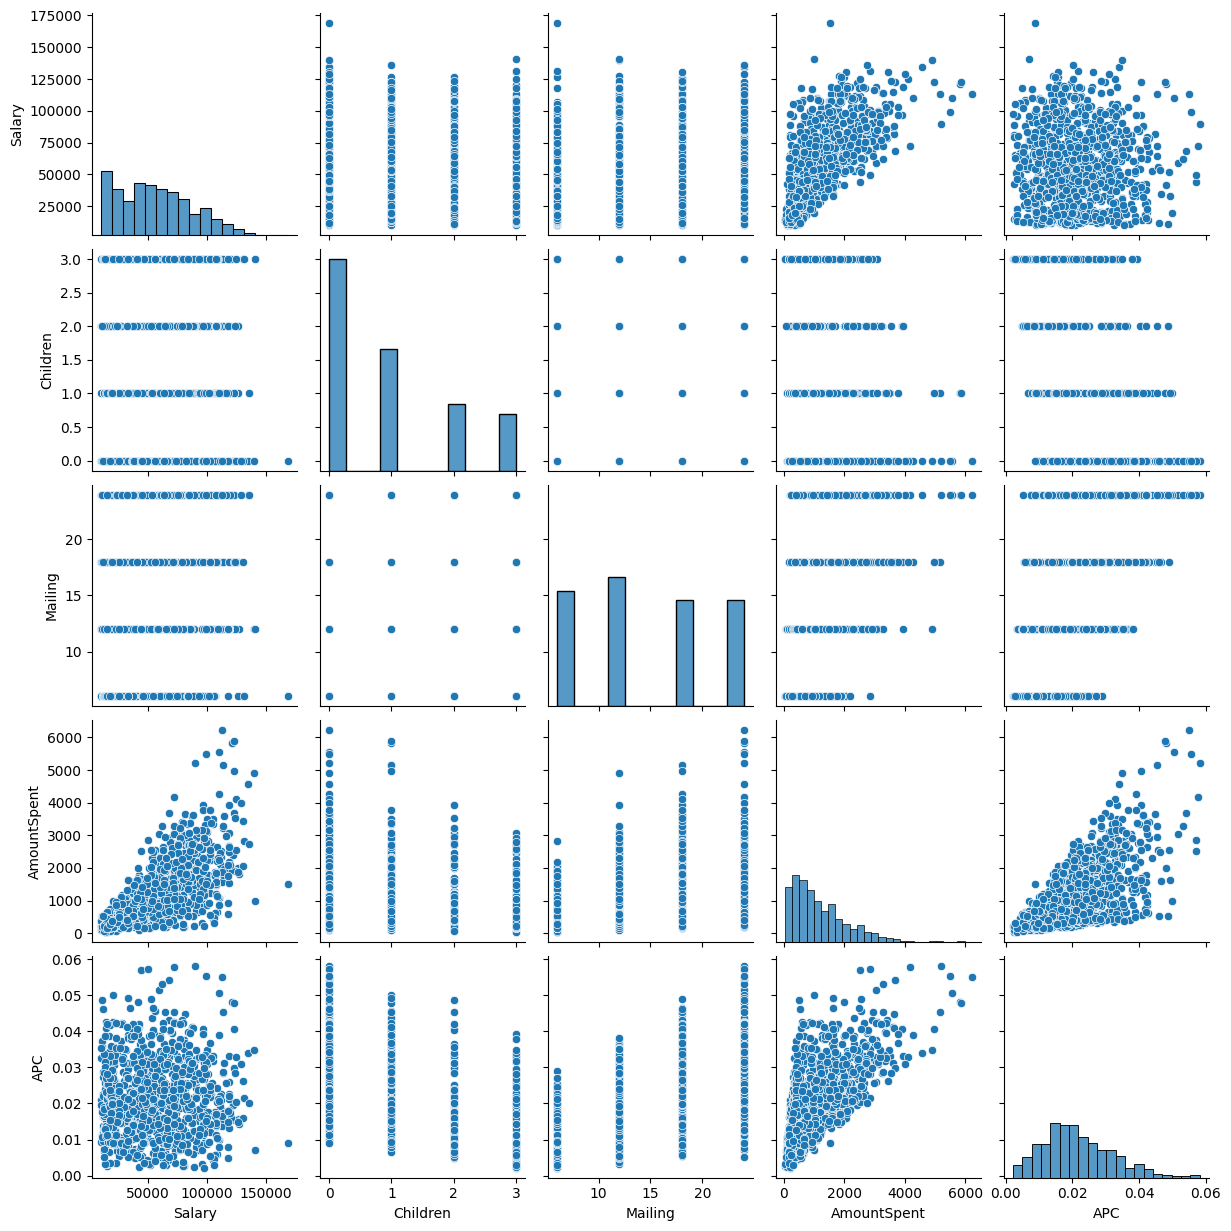

In [ ]:
# pair plot
sns.pairplot(direct_marketing)  
plt.show()

# 3. 모델링
- 회귀 예측 모델링 : Regression, RandomForest, SVM 
- 설명은 Notion 참조

## 3-1. 회귀분석

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
direct_marketing_data = pd.get_dummies(direct_marketing)

In [ ]:
direct_marketing_data.columns

Index(['Salary', 'Children', 'Mailing', 'AmountSpent', 'APC', 'Age_Middle',
       'Age_Old', 'Age_Young', 'Gender_Female', 'Gender_Male', 'OwnHome_Own',
       'OwnHome_Rent', 'Married_Married', 'Married_Single', 'Location_Close',
       'Location_Far', 'History_High', 'History_Low', 'History_Medium',
       'History_None'],
      dtype='object')

In [ ]:
import numpy as np

In [ ]:
X= direct_marketing_data[['Salary', 'Children', 'Mailing',  'Age_Middle', 'Age_Old',
       'Age_Young', 'Gender_Female', 'Gender_Male', 'OwnHome_Own',
       'OwnHome_Rent', 'Married_Married', 'Married_Single', 'Location_Close',
       'Location_Far', 'History_High', 'History_Low', 'History_Medium',
       'History_None']]  
y = np.sqrt(direct_marketing_data['AmountSpent']) # sqrt값 이용 -> 그냥 "y값" (5분)

In [ ]:
y1 = direct_marketing_data['AmountSpent'] # sqrt값 이용 -> 그냥 "y값" (5분)

In [ ]:
y2 = direct_marketing_data['AmountSpent']^2 # sqrt값 이용 -> 그냥 "y값" (5분)

In [ ]:
from sklearn.model_selection import train_test_split   
X_train, X_test, y_train, y_test = train_test_split(X, #독립 변수 
                                                    y, #종속 변수
                                                    test_size=0.3,  #검증 20%, 30%   2시 45분
                                                    random_state=10)

In [ ]:
from sklearn.model_selection import train_test_split   
X_train, X_test, y1_train, y1_test = train_test_split(X, #독립 변수 
                                                    y1, #종속 변수
                                                    test_size=0.3,  #검증 20%   
                                                    random_state=10)

In [ ]:
from sklearn.model_selection import train_test_split   
X_train, X_test, y2_train, y2_test = train_test_split(X, #독립 변수 
                                                    y2, #종속 변수
                                                    test_size=0.3,  #검증 20%   
                                                    random_state=10)

In [ ]:
# 단순회귀분석 모형 객체 생성
lr = LinearRegression()  
lr.fit(X_train, y1_train)

LinearRegression()

In [ ]:
# 단순회귀분석 모형 객체 생성
lr = LinearRegression()  
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 단순회귀분석 모형 객체 생성
lr = LinearRegression()  
lr.fit(X_train, y2_train)

LinearRegression()

In [ ]:
# train의 R^2 값
lr.score(X_train, y1_train)

0.7444945636753726

In [ ]:
# train의 R^2 값
lr.score(X_train, y2_train)

0.744480223143557

In [ ]:
# train의 R^2 값
lr.score(X_train, y_train)

-12041.127295106227

In [ ]:
# test의 R^2 값
lr.score(X_test, y1_test)
# R^2 값이 0.83으로 선형회귀에 잘 적합함을 확인할 수 있다. 

0.7482335259699595

In [ ]:
# test의 R^2 값
lr.score(X_test, y_test)
# R^2 값이 0.83으로 선형회귀에 잘 적합함을 확인할 수 있다. 

-12747.51816399404

In [ ]:
y_predict = lr.predict(X_test)

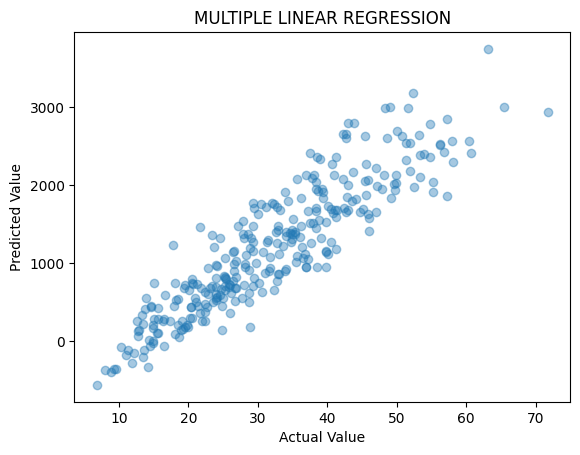

In [ ]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
# 그림을 그려보니 선형에 잘 적합함을 확인 가능하다. 

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE

1431.9231482414268

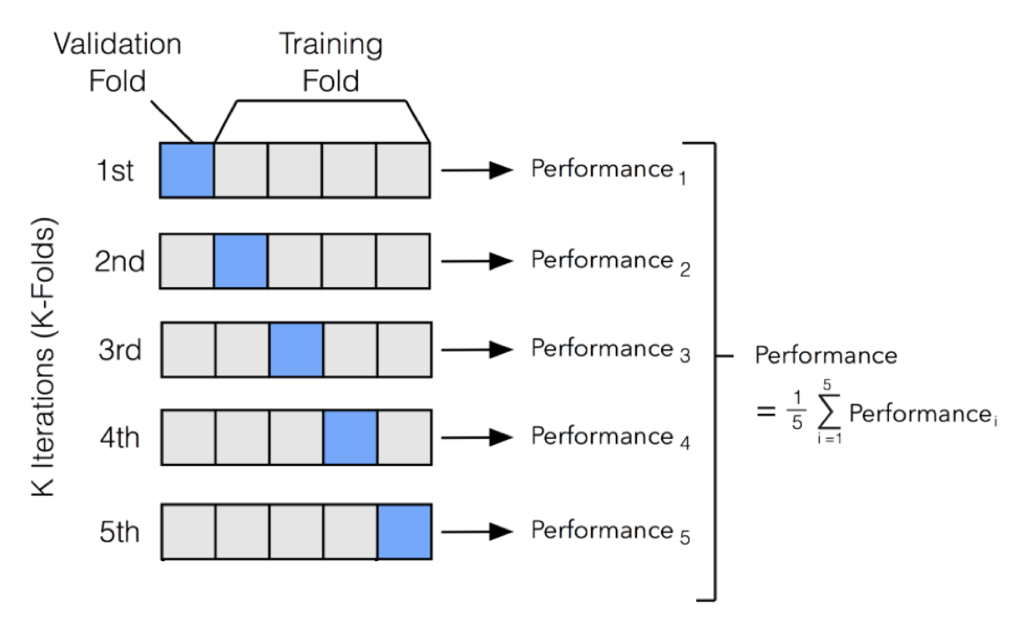

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(lr, X_train,y_train)
print(scores)

{'fit_time': array([0.0074122 , 0.00477529, 0.00452614, 0.00461292, 0.00464773]), 'score_time': array([0.00264263, 0.00236678, 0.00237656, 0.00238276, 0.00234437]), 'test_score': array([0.83523008, 0.82361744, 0.80723996, 0.80102606, 0.82909895])}


In [ ]:
import numpy as np

print(np.mean(scores['test_score']))

0.8192424973395065


In [ ]:
cores = cross_validate(lr, X_test,y_test)
print(scores)

{'fit_time': array([0.0074122 , 0.00477529, 0.00452614, 0.00461292, 0.00464773]), 'score_time': array([0.00264263, 0.00236678, 0.00237656, 0.00238276, 0.00234437]), 'test_score': array([0.83523008, 0.82361744, 0.80723996, 0.80102606, 0.82909895])}


In [ ]:
import numpy as np

print(np.mean(scores['test_score']))

0.8192424973395065


## 3-2. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor() # 분류 트리(default) 객체 생성
rf.fit(X=X_train, y=y_train)

RandomForestRegressor()

In [ ]:
y_predict = rf.predict(X = X_test)

In [ ]:
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE
# RMSE가 5.38로 선형회귀보다 조금 높다

5.3773889291606825

## 3-3. 인공신경망

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)

In [ ]:
y_predict =mlp.predict(X_testscaled)

In [ ]:
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE
# RMSE가 5.55로 증가했다

4.916772561874358

## 3-4. 앙상블

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
voting_model = VotingRegressor(
    estimators=[('lr',lr),('rf',rf),('mlp',mlp)], # 3개의 약한 학습기
    n_jobs = 1
)

In [ ]:
# 앙상블 모델 학습
voting_model.fit(X_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor()),
                            ('mlp',
                             MLPRegressor(hidden_layer_sizes=(64, 64, 64),
                                          max_iter=2000, random_state=1))],
                n_jobs=1)

In [ ]:
ens_predict = voting_model.predict(X_test)

In [ ]:
RMSE = mean_squared_error(y_test, ens_predict)**0.5
RMSE
# RMSE가 5.92로 가장 높다 -> 이용하지 않음 

5.920506229962375

# 결론 : 선형회귀가 가장 좋은 성능을 보인다

# 선형회귀 성능 올리기 : 규제 (Regularization)

-  규제:학습이 과대적합 되는 것을 방지하고자 일종의 penalty를 부여하는 것

## 릿지회귀

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge().fit(X_train, y_train)

In [ ]:
# test의 R^2 값
ridge.score(X_test, y_test)
# R^2 값이 0.83으로 선형회귀에 잘 적합함을 확인할 수 있다. 

0.8350266285597455

In [ ]:
y_predict = ridge.predict(X_test)

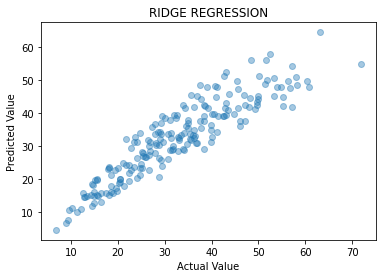

In [ ]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("RIDGE REGRESSION")
plt.show()
# 그림을 그려보니 선형에 잘 적합함을 확인 가능하다. 

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE # 미세하게 0.001 정도 감소했다.

5.2505664132764

In [ ]:
# alpha값을 높이면 계수를 0에 더 가깝게 만들어 훈련세트의 성능은 나빠지지만 일반화에는 쉬워진다.
# alpha값을 바꿔서 확인해보자.

ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge10.score(X_test,y_test))) # 일반화가 잘되면서 test R^2 값이 증가함 

훈련 세트의 정확도 : 0.83
테스트 세트의 정확도 : 0.84


In [ ]:
y_predict = ridge10.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE # RMSE가 0.01 감소했다 

5.246160281515729

In [ ]:
# 반대로 alpha값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 LinearRegression으로 만든 모델과 거의 같아진다.

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge01.score(X_test,y_test)))

훈련 세트의 정확도 : 0.83
테스트 세트의 정확도 : 0.83


In [ ]:
y_predict = ridge01.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE # RMSE가 0.001 감소했다 

5.251427146701299

# 결론 : 릿지회귀, alpha = 10인 경우가 BEST